# Loan Prediction

In [2]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

In [3]:
#Getting the train and test files

train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [4]:
#Copying the data into new variables so that even if we make any changes in the dataset 
#we do not loose the original dataset

train_original = train.copy()
test_original = test.copy()

In [5]:
#Checking the train dataset column

train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#Checking the test dataset column, you'll notive there is no 'Loan_Status' column in test dataset

test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
#Checking the datatypes of each column in train dataset

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
#Lets check the shape of test and train dataset

print('train:', train.shape)
print('test:', test.shape)

train: (614, 13)
test: (367, 12)


In [10]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### We can see from the summary that total applicant are 614, however look into LoanAmount, Loan_Amount_Term, and Credit_History, we can see that the numbers are less tha 614, so we can identify that the values are missing.
### On the other hand, we can see min income of an applicant is 150 and maximum is 81000 there is good variation and we can assume that there might be outliers(we'll make it sure later in the analysis).
### Coming to other variables we can anlyse more insights

In [12]:
#Lets check the Loan Status of applicants 

train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### We can see out of 614 applicant 422 applicants got the loan approved and 192 were not.

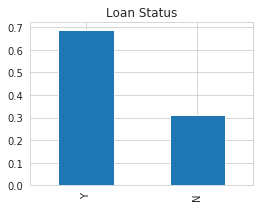

In [14]:
#Lets visualize the Loan status

sns.set_style('whitegrid')
train['Loan_Status'].value_counts(normalize = True).plot.bar(figsize = (4, 3), title = 'Loan Status')

In [15]:
#Calculating the percent of loans approved

percent_loan_approved = 422/614
percent_loan_approved

0.6872964169381107

In [16]:
It is 69% of applicants who's loan has been approved¶

SyntaxError: invalid syntax (<ipython-input-16-937681847908>, line 1)

# Data Visualization

## Lets visualize the categorical and ordinal features first

## Independent Variable - Categorical Features¶

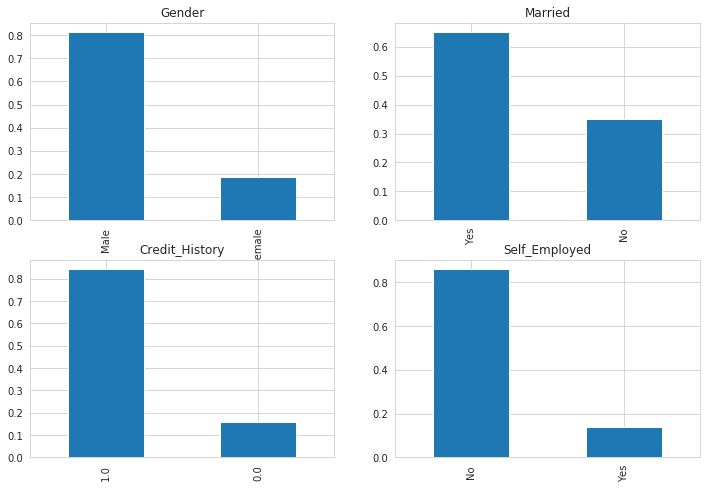

In [19]:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (12,8), title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(figsize = (12,8), title = 'Married')
plt.subplot(223)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (12,8), title = 'Credit_History')
plt.subplot(224)
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize = (12,8), title = 'Self_Employed')
plt.show()

### From the above figures we can analyze that:
1. 80% of the apllicants in the dataset are Males
2. Approximately 65% of the applicants are Married
3. Approximately 85% applicants have repaid their debts
4. Around 15% applicants are Self Employed

## Independent Variables - Ordinal Features

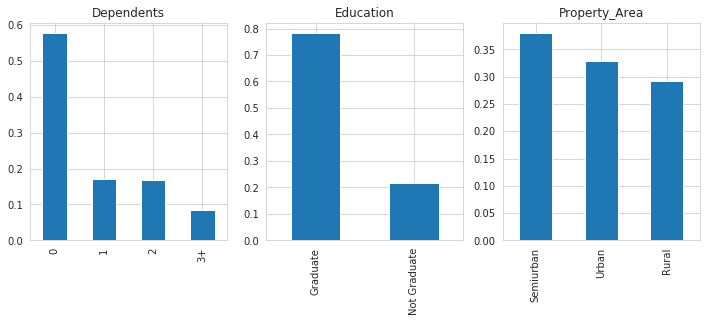

In [22]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (12, 4), title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (12, 4), title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (12, 4), title = 'Property_Area')
plt.show()

### From the above figure we can analyse that:
1. Most of the apllicants does not have dependents
2. Around 80% applicants are Graduate
3. Around 40% applicants have from Semiurban area followed by in Urban then in Rural

## Independent Variables - Numerical Features

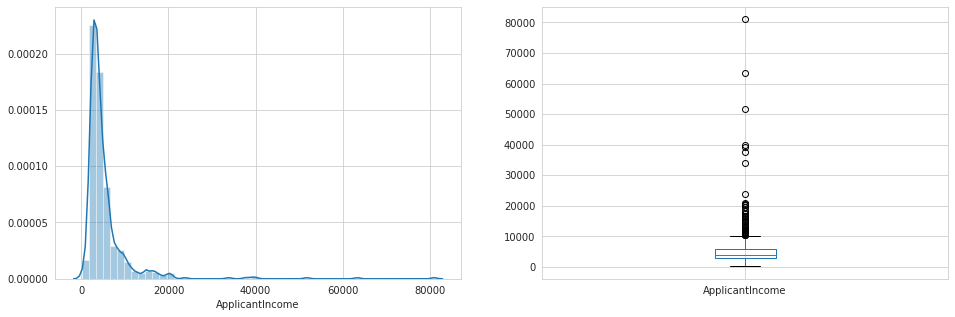

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16, 5))
plt.show()

### We can see that the data is more towards the left and it is not normaly distributed. Also, we can see in the boxplot that there is variation in applicant income and there are outliers.

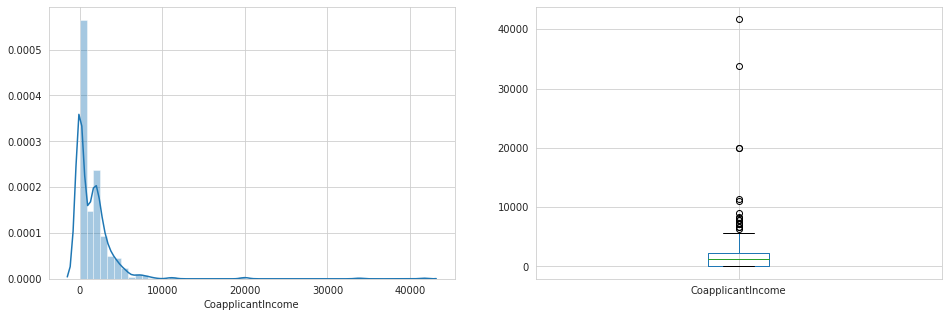

In [27]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16, 5))
plt.show()

### We can see that the data is more towards the left and is not normally distributed. And in the boxplot as well there are outliers.

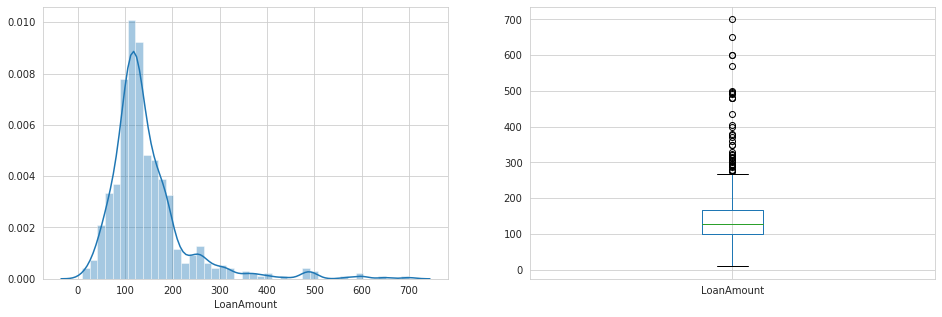

In [29]:
plt.figure()
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

### Here we can see that the data is quite normally distributed. But, there are outliers there.

## Bivariate Analysis 

In [32]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


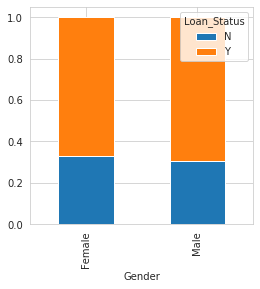

In [33]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

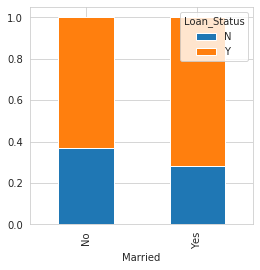

In [34]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(4,4))

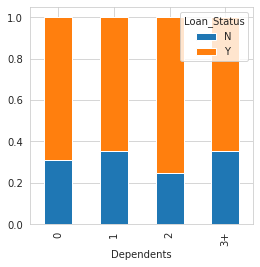

In [35]:
Dependents =pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis =0).plot(kind='bar',stacked=True, figsize=(4,4))

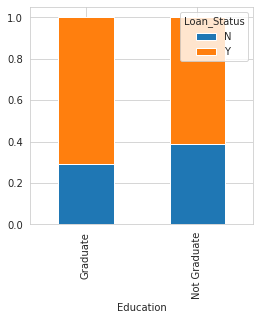

In [36]:
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True, figsize=(4,4))

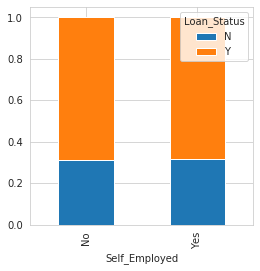

In [37]:
Self_Emp = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Emp.div(Self_Emp.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize=(4,4))

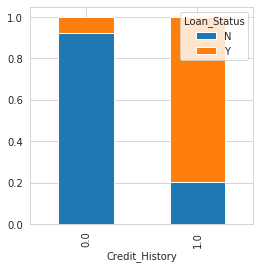

In [38]:
credit_history = pd.crosstab(train['Credit_History'], train['Loan_Status'])
credit_history.div(credit_history.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

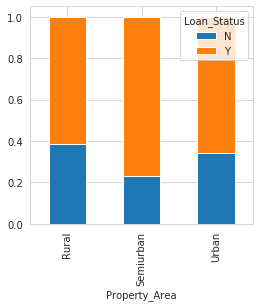

In [39]:
prop_area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
prop_area.div(prop_area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

### By these figures, we analyze:
1. From 'Gender' analysis we can see that both male and female more or less have loan approved
2. From 'Married', we understand that applicant who are married get more loans approved than applicant who are not married
3. Talking about 'Dependents', we understand that the distribution is similar in 1 and 3+ and from 0 and 2, 2 has more loans approved than 0 dependents.
4. About 'Education', applicants who are graduate gets more Loan approved
5. Seeing Self_Employment, both applicants more or less are same.
6. Looking at 'credit_history', we can see that applicant who have paid their previous loan get loan approved
7. Looking at 'property area', we analyse that applicant from Semiurban get there loan approved.

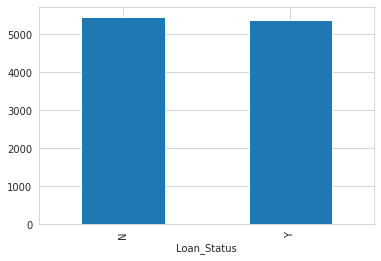

In [41]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar')

### Here, we cannot determine the proper bracket of salary of the applicant, we're not able see the mean salaries ans cannot make proper analysis so, lets make bins to determine that.

In [43]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['low', 'avg', 'high', 'very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)

Text(0, 0.5, 'Percentage')

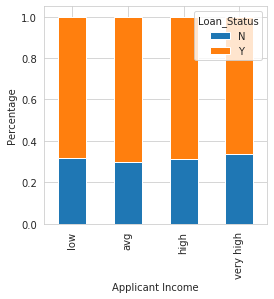

In [44]:
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis =0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

### We can see that the all category are more or less have same number of loans approved, so, it can be inferred that income does not effect the chances of loan approved.
### Now, lets check with Coapplicant Income

In [46]:
bins1 = [0, 1000, 3000, 42000]
group1 = ['low', 'avg', 'high']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins1, labels = group1)

Text(0, 0.5, 'Percentage')

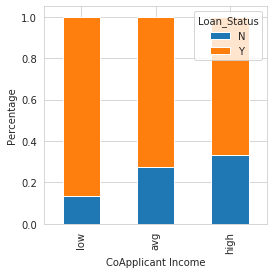

In [47]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xlabel('CoApplicant Income')
plt.ylabel('Percentage')

### We see that applicant who have low income gets the loan approved, but that does not seems right that could be because many applicants does not have Coapplicants and hence we can say that loan aprroval does not depend on the Coapplicant.

### Let's combine the income of applicant and CoApplicant and check if there is any effect on Loan Status

In [49]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bin2 = [0,2500,3000,6000, 81000]
group2 = ['low', 'avg', 'high', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bin2, labels = group2)

Text(0, 0.5, 'Percentage')

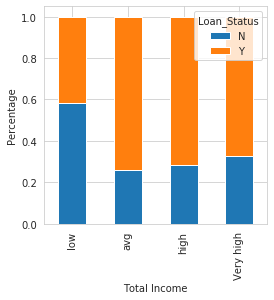

In [50]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize= (4,4))
plt.xlabel('Total Income')
plt.ylabel('Percentage')

### We can see from the fig that applicant with avg income get there loan approved followed by high income and very high income, where applicant with low income get less loan approved which seems right and goes with our hypothesis.

### Now let's visualize the Loan amount variable

In [52]:
bin3 = [0, 100, 200, 700]
group3 = ['low', 'avg', 'high']
train['Loan_Amount_bin'] = pd.cut(train['LoanAmount'], bin3, labels = group3) 

Text(0, 0.5, 'Percentage')

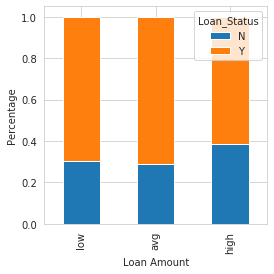

In [53]:
Loan_Amount_bin = pd.crosstab(train['Loan_Amount_bin'], train['Loan_Status'])
Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')  

### Low amount Income applicant get more loan approved. We can agree on our hypothesis that low amount of loan get more approval which is proved with this analysis.

In [62]:
#Lets delete the bin cells know

train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'Total_Income', 'Loan_Amount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [63]:
train['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

### We converted the values into numeric so that we can see the correlation between the variables. 

In [65]:
matrix = train.corr()
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


### Lets visualize using heatmap. Tt the best way to see the correclation between the variables as it shows dark color for strong correlation and light color shows less correlation.

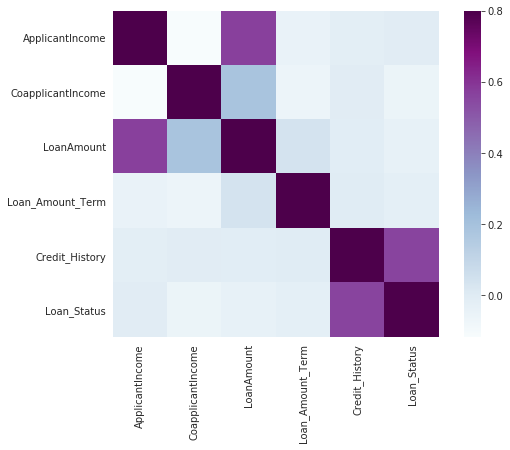

In [67]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, square=True, vmax=.8, cmap='BuPu', )

### We see there is strong correlation between:
1. Applicant Income - Loan Amount
2. Credit History - Loan Status
3. Coapplicant Income - Loan Amount

# Data Cleaning
1. Dealing with missing values
2. Dealing with outliers

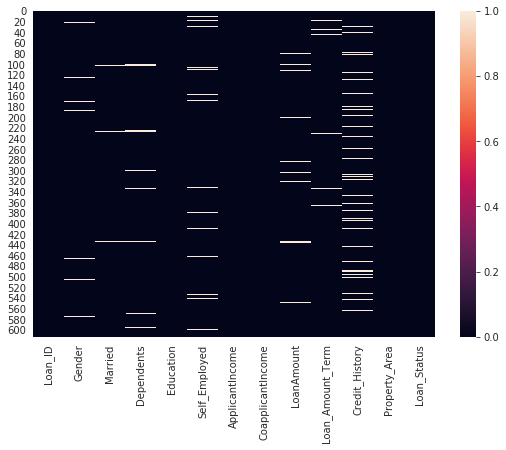

In [70]:
#Checking for missing value

f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(train.isnull())

### We can see that there are a lot of values missing in columns, lets work on them

In [71]:
#Working on Categorical null values

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [72]:
print(train.isnull().sum().sort_values(ascending=False))

LoanAmount           22
Loan_Amount_Term     14
Loan_Status           0
Property_Area         0
Credit_History        0
CoapplicantIncome     0
ApplicantIncome       0
Self_Employed         0
Education             0
Dependents            0
Married               0
Gender                0
Loan_ID               0
dtype: int64


### We have filled categorical values now its time to fill numeric values which are LoanAmount and Loan_Amount_Term

In [73]:
#We can use mode to fill values in Loan_Amount_Term

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [74]:
#Working with LoanAmount variable

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [76]:
#Checking number of null values in train dataset

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [77]:
#Lets fill the values in test dataset also

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

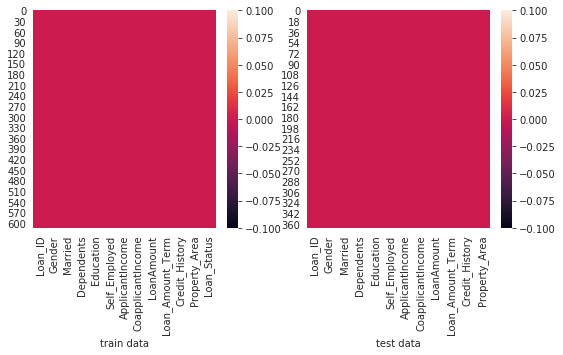

In [78]:
#Lets visualize if there is any missing value in train and test data

f, ax = plt.subplots(figsize=(9,4))
plt.figure(1)
plt.subplot(121)
sns.heatmap(train.isnull())
plt.xlabel('train data')
plt.subplot(122)
sns.heatmap(test.isnull())
plt.xlabel('test data')
plt.show()

### We can see that there is no missing value in the datasets now.

# Outlier Treatment

### We have seen while exploring our data that there were outliers in LoanAmount, from graph also we identified that most of the data was accumulated in the left and there was data spread onto  the right. This is known as right skewness. Outliers effect the data and does not give desired output so, it is important to treat them. There is one of the methods called 'log transformation' to treat the outliers, we can use it with the help of numpy library. Log transformation does not affect the small values much but reduce the large values. So, by doing this we get the normal distribution in our data. Lets do that.

In [79]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])

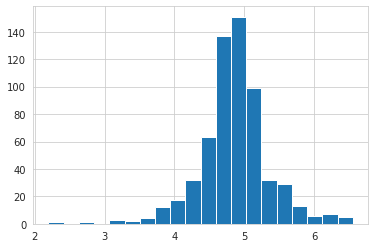

In [80]:
#Lets visualize the distribution after applying log transformation

train['LoanAmount_log'].hist(bins=20)

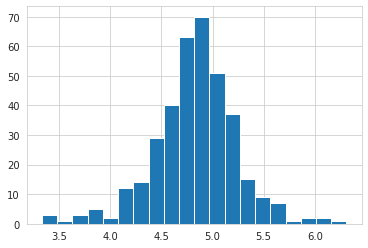

In [108]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

### Now, distibution looks normal as it is not accumulated at one side.

# Predictive Analysis

## Logistic Regression

In [123]:
#Let us drop Loan_ID from both test and train datset as it does not have any effect on loan status

train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

KeyError: "['Loan_ID'] not found in axis"

In [111]:
#Inroducing dependent and Independent variable

X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [112]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [113]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [115]:
#Defining the model

model = LogisticRegression()

In [129]:
#Fitting the model

model.fit(x_train, y_train)

/home/riya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
#Making prediction

predictions = model.predict(x_test)

In [131]:
#Checking predictions

accuracy_score(predictions, y_test)

0.8162162162162162

### We can say that our model is 82% accurate. We have identified 82% of loan status accurately.

In [132]:
#Lets make predictions for test dataset

pred_test = model.predict(test)

In [135]:
# Creating csv file for our predictions

submission = pd.read_csv("sample_submission_49d68Cx.csv")

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [136]:
submission['Loan_Status'].replace(0, 'N', inplace=True) 
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [140]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Loan_prediction.csv')